# **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

First, we recall the plot - both in 2D and 3D:

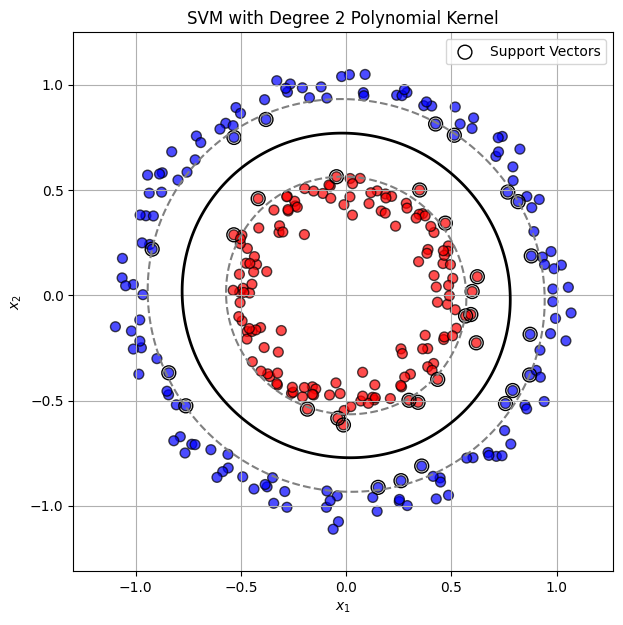

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Convert labels from (0,1) to (-1,1) for SVM
y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, c=0)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
# scikit uses a complex scaled gamma for the kernels. Here we want to use non-optimal (but simplest!) kernels
# K(x, x') = (x^T x')^2
clf.fit(X, y)

# 3. Create Meshgrid for Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and Stack Grid for Prediction
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision = decision.reshape(xx.shape)

# 4. Plot Data Points and Decision Boundary
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Plot Decision Boundary and Margins
plt.contour(xx, yy, decision, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')

# Highlight Support Vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM with Degree 2 Polynomial Kernel')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)

plt.gca().set_aspect('equal')  #  making the plot square
plt.show()

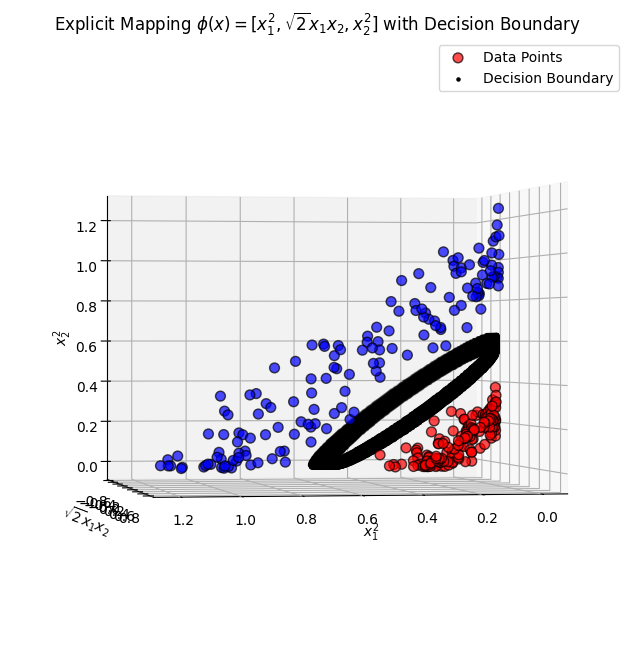

In [24]:
# 3D Plot for phi(x) with Decision Boundary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 5. Visualize Explicit Mapping phi(x) = [x1^2, sqrt(2) x1 x2, x2^2]

# Apply phi(x) to each point
phi_X = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in X])

# Apply phi(x) to the meshgrid for decision boundary
phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])

# Scatter plot of transformed data
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7, label='Data Points')

# Plot only the decision boundary contour (i.e. where decision == 0)
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0.0, atol=0.15)  # select points near decision boundary
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Decision Boundary')

# Set axis labels and title for 3D plot
ax.set_title('Explicit Mapping $\phi(x) = [x_1^2, \sqrt{2} x_1 x_2, x_2^2]$ with Decision Boundary')
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\sqrt{2} x_1 x_2$')
ax.set_zlabel('$x_2^2$')

# Add legend and grid
ax.legend()
ax.grid(True)
ax.view_init(0, 80, 0)

plt.show()

The mapping $\phi(.)$ allows for linear separation in high-dimensional feature space (here: 3D). The decision boundary in the original 2D space is non-linear and there is no good reason to believe that it becomes a "flat" hyperplane after transforming it using non-linear function $\phi(.)$.

The main idea is that after transformation we can find a "flat" hyperplane that will separate the points in 3D. We can see that on the plot above that it is indeed possible to find such a hyperplane. When we find such a "flat" hyperplane in 3D, we can then intersect it with the non-linear surface obtained via transformation $\left(x\mapsto \phi(x)\right)$ and, after that, transform it backwards into 2D. From such a procedure we will get a non-linear decision boundary visible in 2D, eg. circle separating datapoints.